# Financial Data Analysis

### Downloaded the dataset from: [Kaggle](https://www.kaggle.com/datasets/samanfatima7/2020-2025-apple-stock-dataset)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("./dataset/Apple Stock 2020-2025.csv")

In [4]:
df.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400


In [5]:
df.drop(0, axis=0, inplace=True)
df

,Date,Close,High,Low,Open,Volume
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
5,2020-06-10,85.74620819091797,86.21522971767824,84.1058417038533,84.54570234634012,166651600
...,...,...,...,...,...,...
1251,2025-05-27,200.2100067138672,200.74000549316406,197.42999267578125,198.3000030517578,56288500
1252,2025-05-28,200.4199981689453,202.72999572753906,199.89999389648438,200.58999633789062,45339700
1253,2025-05-29,199.9499969482422,203.80999755859375,198.50999450683594,203.5800018310547,51396800
1254,2025-05-30,200.85000610351562,201.9600067138672,196.77999877929688,199.3699951171875,70819900


## Calculating Weekly returns

#### used `".pct_change()"` to calculate fractional change between the current and a prior element.

* Computes the fractional change from the immediately previous row by default. This is useful in comparing the fraction of change in a time series of elements.

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [7]:
df["Close"] = pd.to_numeric(df["Close"], errors="raise")

In [8]:
weekly_df = df["Close"].resample("W").last()
weekly_df

Date
2020-06-07     80.560219
2020-06-14     82.334267
2020-06-21     84.987999
2020-06-28     85.938202
2020-07-05     88.484993
                 ...    
2025-05-11    198.270004
2025-05-18    211.259995
2025-05-25    195.270004
2025-06-01    200.850006
2025-06-08    201.699997
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

In [9]:
weekly_returns = weekly_df.pct_change()

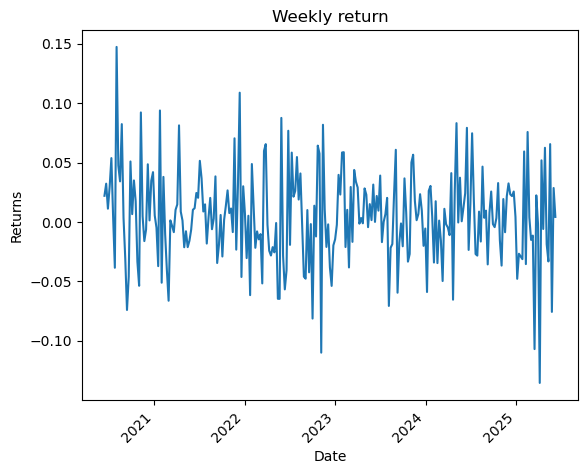

In [10]:
plt.plot(weekly_returns.index, weekly_returns)
plt.title('Weekly return')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45, ha="right")
plt.show()

## Trend Analysis

In [11]:
weekly_ma = weekly_df.rolling(10).mean()

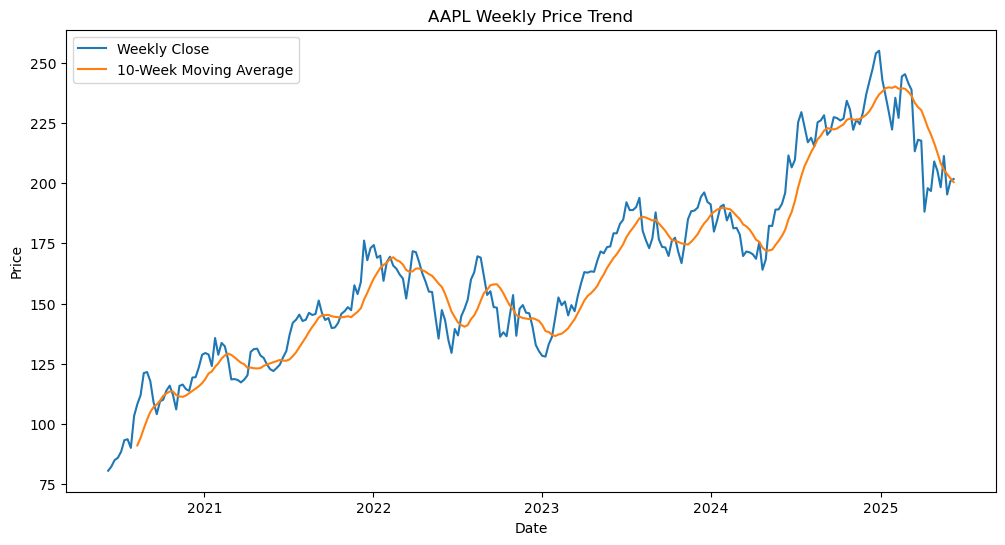

In [12]:
plt.figure(figsize=(12,6))
plt.plot(weekly_df.index, weekly_df, label="Weekly Close")
plt.plot(weekly_ma.index, weekly_ma, label="10-Week Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Weekly Price Trend")
plt.legend()
plt.show()

## Cumulative Returns

In [13]:
cumulative_returns = (1 + weekly_returns).cumprod()

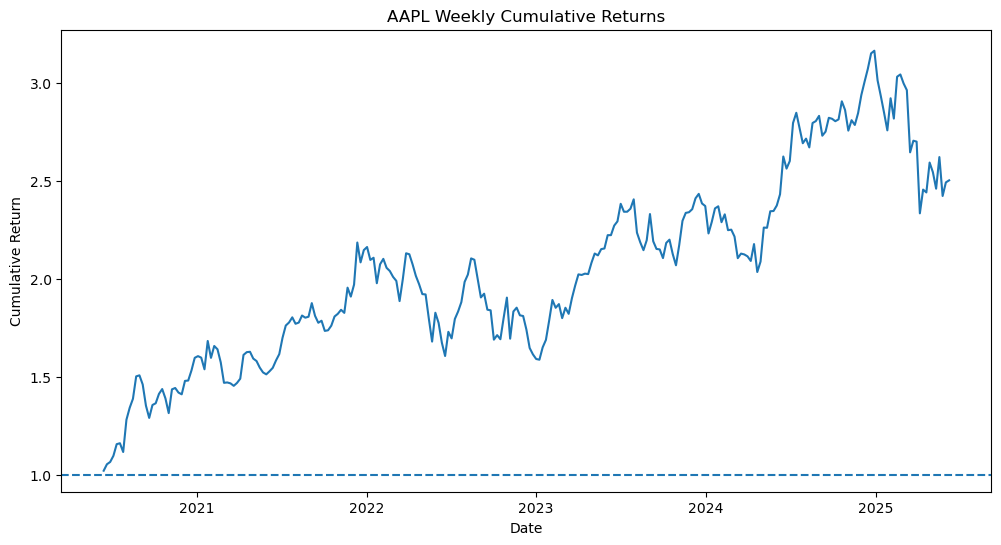

In [14]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns.index, cumulative_returns)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("AAPL Weekly Cumulative Returns")
plt.axhline(1, linestyle="--")  # starting value
plt.show()